### Selenium을 이용한 이미지 크롤링
- 유투브 영상을 이미지로 크롤링
- 특정 영역(Element)을 자르기
    - pillow package 사용
    - pillow : python을 이용해서 이미지를 전처리해주는 대표적인 패키지
    - pillow install
        - `conda install -c anaconda pillow`
        - `pip install pillow`
- 유투브 영상 데이터를 다운로드
- fake_useragent 사용법
- headless 설정
    - 브라우저를 화면에 띄우지 않고 RAM영역에서만 띄어서 사용하는 방법
    - 서버에서 selenium을 이용해서 크롤링할때 사용

In [2]:
import requests
import time
import pandas as pd
from selenium import webdriver
from PIL import Image as pil

### 1. 이미지 스크린샷

In [7]:
url = "https://www.youtube.com/watch?v=-rAeqN-Q7x4&t=120s"
driver = webdriver.Chrome()
driver.get(url)

In [8]:
# datas폴더에 스크린샷을 저장 후 종료
driver.save_screenshot("datas/screenshot.png")
driver.quit()

In [9]:
# 저장 확인
!ls datas

screenshot.png


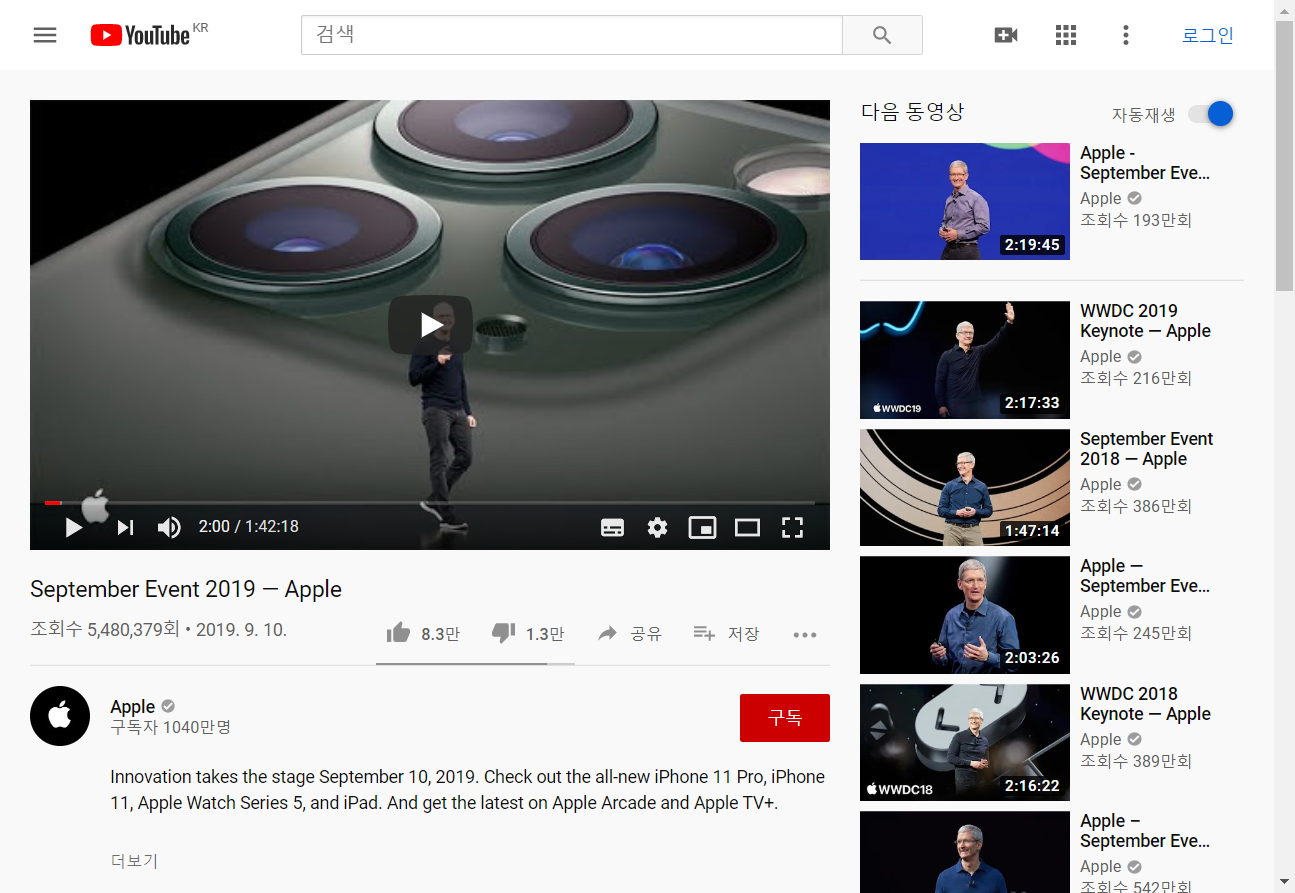

In [10]:
pil_img = pil.open("datas/screenshot.png")
pil_img

### 2. 특정 영역의 엘리먼트 좌표값 구하기

In [11]:
driver = webdriver.Chrome()
driver.get(url)

In [12]:
# 특정 엘리먼트의 위치값 찾기
element = driver.find_element_by_css_selector("#movie_player") # 영상이 나오는 부분의 엘리먼트 아이디
location = element.location # x, y
size = element.size # height, width
print(location, size)
driver.quit()

{'x': 24, 'y': 80} {'height': 360, 'width': 640}


In [53]:
# area 변경 : 해상도에 따라서 비율이 달라지기 때문에 비율을 맞춰줘야한다.
left = location["x"] * 1.2
top = location["y"]
right = left + size["width"] * 1.27
bottom = top + size["height"] * 1.5

area = (left, top, right, bottom)
area

(28.799999999999997, 80, 841.5999999999999, 620.0)

### 3. 이미지를 pillow로 잘라주기

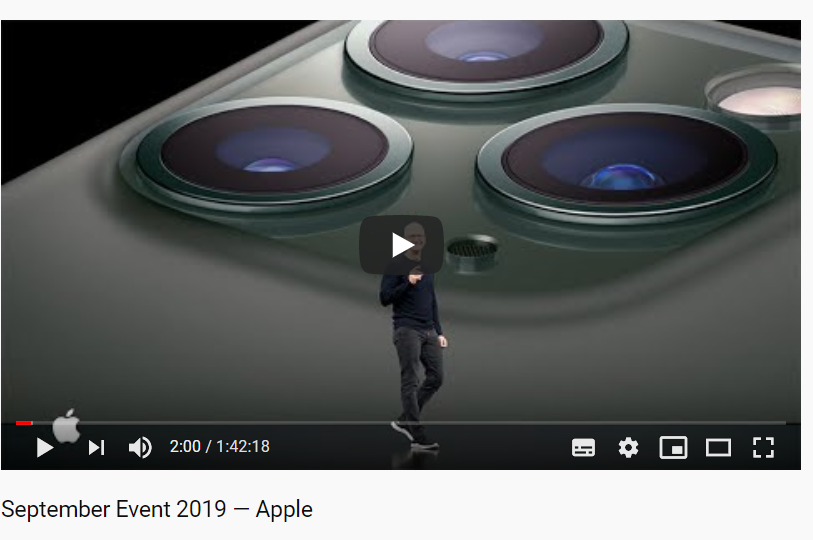

In [54]:
pil_element_img = pil_img.crop(area)
pil_element_img

In [55]:
# 이미지 저장
pil_element_img.save("datas/screenshot_element.png")

In [57]:
# 저장 확인
!ls datas

screenshot.png
screenshot_element.png


### 4. 썸네일 만들기
- 원본 이미지를 다양한 사이즈로 축소하는 방법

In [58]:
pil_element_img.size

(813, 540)

(241, 160)


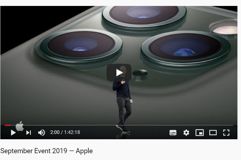

In [63]:
pil_element_img.thumbnail((270, 180))
print(pil_element_img.size)
pil_element_img

### fake useragent

In [64]:
from fake_useragent import UserAgent

In [67]:
# 크롬 드라이버의 Agent 확인
driver = webdriver.Chrome()
agent = driver.execute_script("return navigator.userAgent;")
driver.quit()
print(agent)

Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36


In [69]:
# user agent 설정
options = webdriver.ChromeOptions()
options.add_argument("user-agent={}".format(UserAgent().chrome))
driver = webdriver.Chrome(options=options)
agent = driver.execute_script("return navigator.userAgent;")
driver.quit()
print(agent) # 실행할때마다 user agent를 바꿔서 사용이 가능한것을 알수있다.

Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/34.0.1866.237 Safari/537.36


### Headless
- 브라우저를 화면에 띄우지 않고 메모리상에서만 실행하는 방법
- 크롬 버전 60 이상에서만 사용이 가능
- window 화면이 지원되지 않는 환경에서 사용

In [70]:
options = webdriver.ChromeOptions()
options.add_argument("headless")
driver = webdriver.Chrome(options=options)
driver.get("https://fastcampus.co.kr/")
print(driver.title) # 사이트 제목
driver.quit()

패스트캠퍼스 | 커리어 성장을 위한 최고의 실무교육 아카데미


### 영상 파일 다운로드
- www. -> ss로 변경하면 다운로드 받을수 있는 사이트에 접속이 된다.

In [1]:
def download(title, link):
    response = requests.get(link, stream=True)
    save_path, size = "datas/{}".format(title), 0
    with open(save_path, "wb") as f:
        for chunk in response.iter_content(chunk_size=1024):
            if chunk:
                size += 1024
                f.write(chunk)
    return size

In [2]:
url = "http://youtube.com/watch?v=dX6x3jfLIZo"

In [3]:
link = "https://r2---sn-vgqsrnek.googlevideo.com/videoplayback?expire=1574336567&ei=1yPWXcPlMM_2xgLxrIHQCg&ip=208.113.155.237&id=o-AL4RFimnE0qFOLvxRZsW4sVO0kAPNVjl7iCA8yJ3K-EF&itag=22&source=youtube&requiressl=yes&mm=31%2C29&mn=sn-vgqsrnek%2Csn-vgqskned&ms=au%2Crdu&mv=u&mvi=1&pl=23&mime=video%2Fmp4&ratebypass=yes&dur=60.580&lmt=1549330634124511&mt=1574314636&fvip=2&fexp=23842630&c=WEB&txp=5535432&sparams=expire%2Cei%2Cip%2Cid%2Citag%2Csource%2Crequiressl%2Cmime%2Cratebypass%2Cdur%2Clmt&sig=ALgxI2wwRQIgIh1xITF0AAi6I_jaonde_gZNNaJysbWDdcEwIN3vw-8CIQCz2vxfrtwwmS9bjOwmvCAIQNXzK_3-yAobXC1YKmxR0g%3D%3D&lsparams=mm%2Cmn%2Cms%2Cmv%2Cmvi%2Cpl&lsig=AHylml4wRAIgOciAAw9vzCVcG6ZcT_osgbbVON98Nx5TAHOdEQOHd-8CIEDIbzbuqYV-MT7aI8XU7D1hMfZCajFU85PJBJ7q8krV&video_id=dX6x3jfLIZo&title=%EC%86%90%ED%9D%A5%EB%AF%BC+%EB%A0%88%EC%8A%A4%ED%84%B0%EC%8B%9C%ED%8B%B0+%EC%9B%90%EC%A0%95+%EA%BC%AC%EB%A7%88%ED%8C%AC+%ED%8B%B0%EC%85%94%EC%B8%A0+%EC%9C%A0%EB%8B%88%ED%8F%BC+%EC%84%A0%EB%AC%BC+%ED%98%84%EC%9E%A5+%EC%98%81%EC%83%81+%28%EC%85%94%EC%B8%A0+%EC%A2%80+%EA%B0%96%EB%8B%A4%EC%A3%BC%EC%84%B8%EC%9A%94+%ED%94%BC%EC%BC%93+%EA%B7%80%EC%97%AC%EC%9B%80%E3%85%8B%E3%85%8B%29"

In [11]:
title = "손흥민유니폼선물현장영상.mp4"
size = download(title, link)
print("{} Mb".format(round(size/1024/1024), 2))

7 Mb
